# Display of interest points and descriptor

We use Scale inariant feature transform if available, AKAZE otherwise

In [6]:
import cv2
import matplotlib.pyplot as pl
from matplotlib.patches import Circle
from matplotlib.collections import PatchCollection
import numpy as np

image=cv2.imread("crop.jpg")

detector = cv2.xfeatures2d.SIFT_create()
#detector = cv2.AKAZE_create() #Alternative if xfeature2d not available
points, descriptors = detector.detectAndCompute(image, None)

(-0.5, 249.5, 359.5, -0.5)

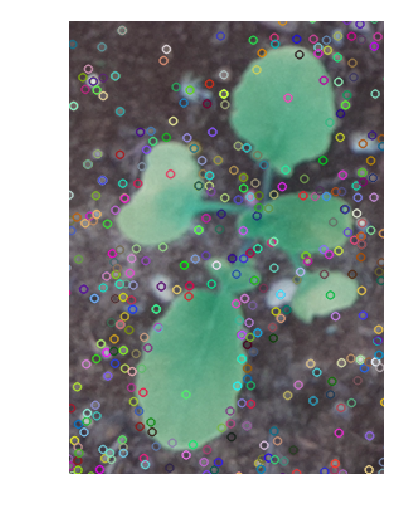

In [4]:
pl.rcParams['figure.dpi'] = 150
im_points=image.copy()
cv2.drawKeypoints(image, points,im_points)
pl.imshow(im_points[1480:1840,1200:1450])
pl.axis("off")

<Container object of 128 artists>

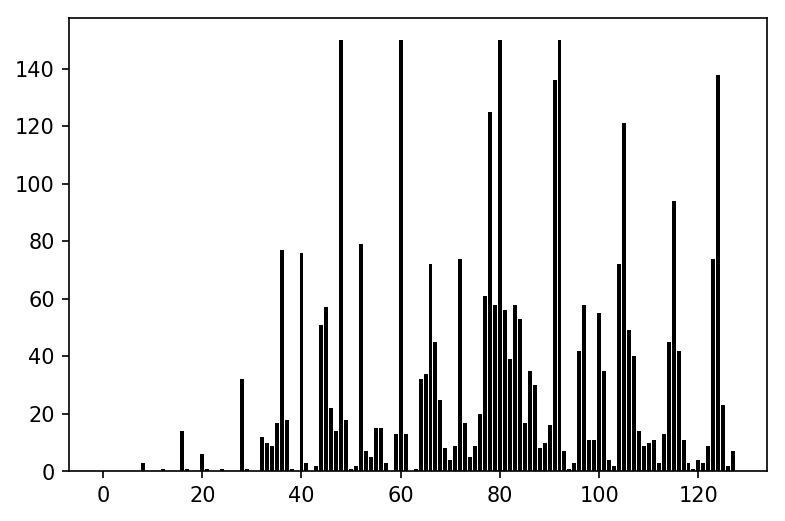

In [8]:
pl.bar(np.arange(128),height=descriptors[0],color="k") #feature vector for interest point 0

# Detecting features in left and right images

In [49]:
im1=cv2.imread("12a.jpg")
im2=cv2.imread("12b.jpg")

im1=cv2.pyrDown(im1)
im2=cv2.pyrDown(im2)

detector = cv2.xfeatures2d.SIFT_create()
#detector = cv2.AKAZE_create() #Alternative if xfeature2d not available

p1, d1 = detector.detectAndCompute(im1, None)
p2, d2 = detector.detectAndCompute(im2, None)

* Looking for matches

In [50]:
norm = cv2.NORM_L2
matcher = cv2.BFMatcher(norm)
raw_matches = matcher.knnMatch(d1, trainDescriptors = d2, k = 2) 

* Looking for the best match

In [17]:
rs=[raw_matches[i][0].distance/raw_matches[i][1].distance for i in range(len(raw_matches))]
idx_best_match=np.argmin(rs)
idx_b1=raw_matches[idx_best_match][0].queryIdx
idx_b2=raw_matches[idx_best_match][0].trainIdx
b1=p1[idx_b1].pt
b2=p2[idx_b2].pt
d_b1=d1[idx_b1]
d_b2=d2[idx_b2]

<Container object of 128 artists>

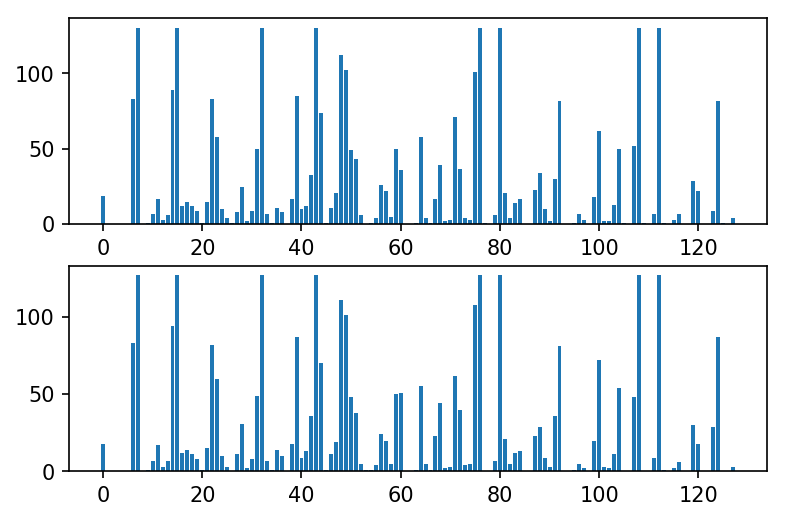

In [15]:
pl.subplot(211)
pl.bar(np.arange(128), d_b1)
pl.subplot(212)
pl.bar(np.arange(128), d_b2)

(-0.5, 79.5, 79.5, -0.5)

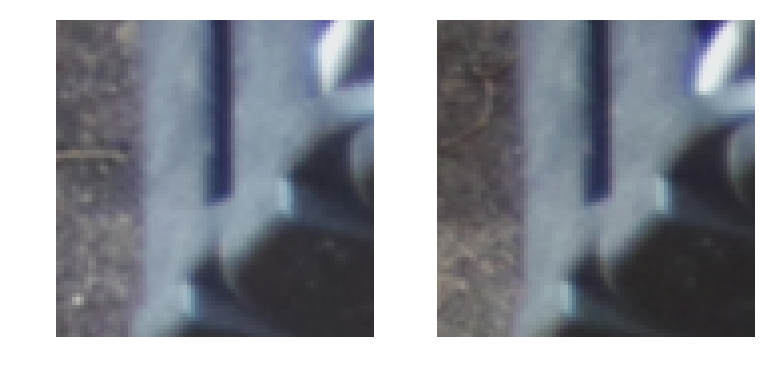

In [25]:
pl.subplot(121)
pl.imshow(im1[int(b1[1]-40):int(b1[1]+40),int(b1[0]-40):int(b1[0]+40),::-1])
pl.axis("off")
pl.subplot(122)
pl.imshow(im2[int(b2[1]-40):int(b2[1]+40),int(b2[0]-40):int(b2[0]+40),::-1])
pl.axis("off")

* Filter matches and draw resulting matches

In [51]:
mp1, mp2 = [], [] 
ratio=0.65
for m in raw_matches:
    if len(m) == 2 and m[0].distance < m[1].distance * ratio:
        mp1.append( p1[m[0].queryIdx] )
        mp2.append( p2[m[0].trainIdx] )
pt1 = np.float32([p.pt for p in mp1])
pt2 = np.float32([p.pt for p in mp2])
match_pairs = list(zip(pt1, pt2))

(-0.5, 3279.5, 1231.5, -0.5)

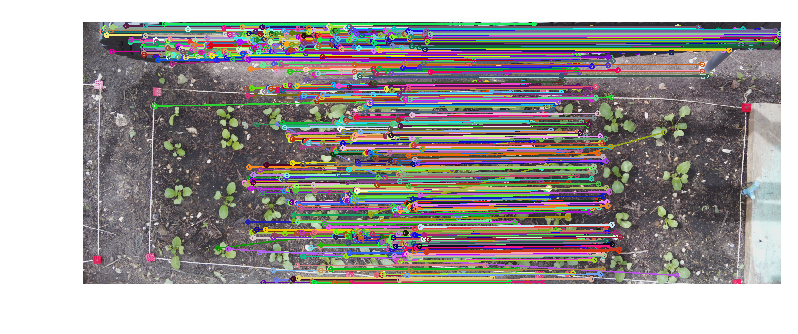

In [52]:
im = np.hstack((im1,im2))
cols = np.random.randint(0,256,[len(match_pairs),3])
for j,m in enumerate(match_pairs):
    p1 = tuple(np.round(m[0]).astype(int))
    p2 = tuple(np.round(m[1]).astype(int) + np.array([im1.shape[1], 0]))
    cv2.line(im, p1, p2, cols[j].tolist(), 5)
    cv2.circle(im, p1, 10, cols[j].tolist(), 5)
    cv2.circle(im, p2, 10, cols[j].tolist(), 5)
pl.imshow(im[:,:,::-1])
pl.axis("off")